In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
deeds_df = pd.concat([pd.read_csv('data/crmls_oms_validation0.csv'), pd.read_csv('data/crmls_oms_validation1.csv')])
deeds_df.head()

/var/folders/6l/yzmcq93j41zf3wrth_tyl6g80000gn/T/ipykernel_13745/2321764194.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  deeds_df = pd.concat([pd.read_csv('data/crmls_oms_validation0.csv'), pd.read_csv('data/crmls_oms_validation1.csv')])
/var/folders/6l/yzmcq93j41zf3wrth_tyl6g80000gn/T/ipykernel_13745/2321764194.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  deeds_df = pd.concat([pd.read_csv('data/crmls_oms_validation0.csv'), pd.read_csv('data/crmls_oms_validation1.csv')])


,dpid,recordingdate,salesprice,standardizedlanduse
0,60010012587,20160601,205000.0,2012.0
1,60010012587,20151104,90000.0,2012.0
2,60010012588,20160601,205000.0,2012.0
3,60010012588,20151104,90000.0,2012.0
4,60010012590,20090814,410000.0,3010.0


In [3]:
len(deeds_df)

14544114

In [4]:
len(deeds_df.drop_duplicates())

14458238

In [5]:
deeds_df['recording_year'] = [str(x)[:4] for x in deeds_df['recordingdate']]
deeds_df.groupby('recording_year')['dpid'].count()

recording_year
2002    686495
2003    853375
2004    923591
2005    902149
2006    683467
2007    548841
2008    711977
2009    728889
2010    685600
2011    659058
2012    651349
2013    618150
2014    556322
2015    601560
2016    604660
2017    609107
2018    580028
2019    571633
2020    573306
2021    704612
2022    539227
2023    410729
2024    139989
Name: dpid, dtype: int64

/var/folders/6l/yzmcq93j41zf3wrth_tyl6g80000gn/T/ipykernel_13745/2635978463.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


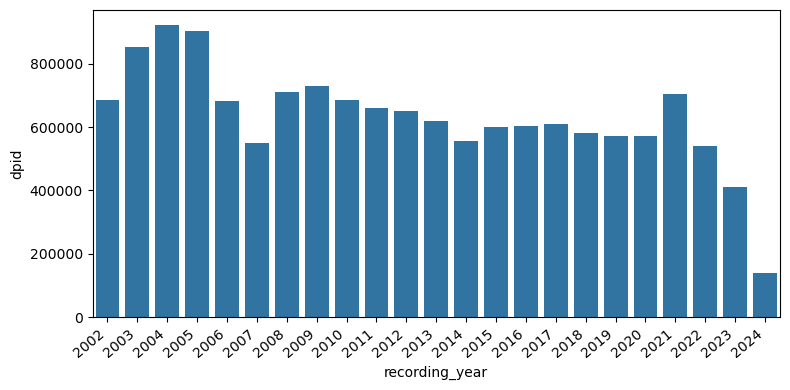

In [6]:
plt.figure(figsize=(8,4))
ax = sns.barplot(deeds_df.groupby('recording_year')['dpid'].count())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


In [7]:
deeds_df['sale_price_order_mag'] = [math.floor(math.log(x, 10)) for x in deeds_df['salesprice']]
deeds_df.groupby('sale_price_order_mag')['dpid'].count()

sale_price_order_mag
1           1
2       69434
3      223896
4     1240609
5    11391635
6     1529032
7       85596
8        3846
9          65
Name: dpid, dtype: int64

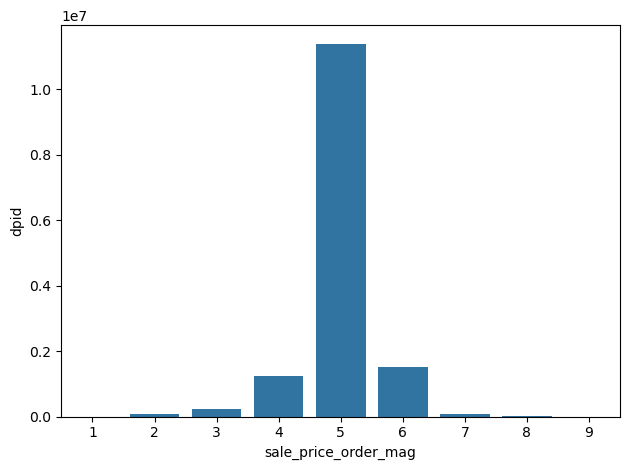

In [17]:
#plt.figure(figsize=(8,4))
ax = sns.barplot(deeds_df.groupby('sale_price_order_mag')['dpid'].count())
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [31]:
deeds_df[deeds_df['sale_price_order_mag'].isin([3])]

,dpid,recordingdate,salesprice,standardizedlanduse,recording_year,sale_price_order_mag
144,60010012671,20150601,2500.0,1004.0,2015,3
190,60010012728,20190321,5000.0,2044.0,2019,3
382,60010012907,20100422,3500.0,5002.0,2010,3
1239,60010013608,20170228,2000.0,1103.0,2017,3
1425,60010013957,20080626,1500.0,1004.0,2008,3
...,...,...,...,...,...,...
7542532,61150037207,20231120,7500.0,7005.0,2023,3
7543488,61150038724,20231101,8000.0,8001.0,2023,3
7543574,61150038727,20231101,8000.0,8001.0,2023,3
7543686,61150038728,20231101,8000.0,13.0,2023,3


In [23]:
deeds_df.groupby('standardizedlanduse')['dpid'].count().sort_values(ascending=False).values.mean()

53862.218518518515

In [29]:
deeds_df.groupby('standardizedlanduse')['dpid'].count()[deeds_df.groupby('standardizedlanduse')['dpid'].count()<=53862].sort_values(ascending=False)

standardizedlanduse
1100.0    32692
1015.0    31865
7005.0    28838
3003.0    28378
8003.0    28180
          ...  
4013.0        3
9304.0        3
4031.0        2
3009.0        2
9218.0        1
Name: dpid, Length: 253, dtype: int64

In [28]:
len(deeds_df['standardizedlanduse'].unique())

271

In [52]:
len(deeds_df.groupby('standardizedlanduse')['dpid'].count()[(deeds_df.groupby('standardizedlanduse')['dpid'].count()<=10000) & (deeds_df.groupby('standardizedlanduse')['dpid'].count()>1000)].sort_values(ascending=False))

57

In [34]:
deeds_df.groupby('standardizedlanduse')['dpid'].count().sort_values(ascending=False).to_clipboard()

In [32]:
69435 / len(deeds_df)

0.0047740962426449625

/var/folders/6l/yzmcq93j41zf3wrth_tyl6g80000gn/T/ipykernel_13745/3194514228.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


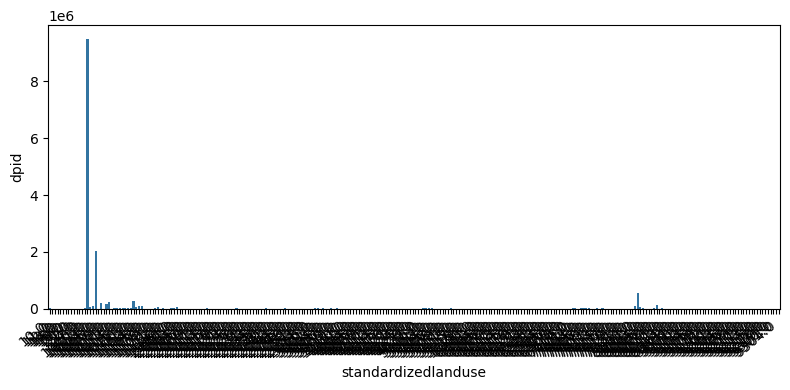

In [54]:
plt.figure(figsize=(8,4))
ax = sns.barplot(deeds_df.groupby('standardizedlanduse')['dpid'].count())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [67]:
deeds_df[deeds_df['standardizedlanduse'].isin([1001,1004,8001,1101])].groupby('recording_year')['salesprice'].max().to_clipboard()

In [68]:
deeds_df[(deeds_df['salesprice'].astype(int)>1000) & (deeds_df['standardizedlanduse'].isin([1001,1004,8001,1101]))].groupby('recording_year')['salesprice'].min().to_clipboard()

In [65]:
deeds_df[deeds_df['salesprice'] == 2017296875]

,dpid,recordingdate,salesprice,standardizedlanduse,recording_year,sale_price_order_mag
4446885,60750022541,20170707,2.017297e+09,2001.0,2017,9
